In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import numpy as np
from os.path import join


17
0.5133300000000001


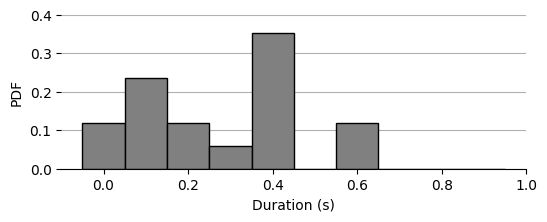

In [2]:
fig, ax = plt.subplots(1,1, figsize=(6,2))

df = pd.concat([
    pd.read_json('./gaps-quic.json'),
    # pd.read_json('./gaps-2sec-quic.json'),
    # pd.read_json('./gaps-1sec-quic.json'),
])
df = df[df['seg_ratio'] > 0.8]
df = df[df['duration'] > 0]
print(len(df))

hist, bins = np.histogram(df['duration'], bins=10, range = (0,1))

print(df.duration.quantile(0.90))

ax.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey', edgecolor='black')

plt.xlabel('Duration (s)')
plt.ylabel("PDF")
# plt.xlim([0, 1])
plt.ylim([0, 0.4])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(which='major', axis='y')
ax.set_axisbelow(True)

plt.savefig("/home/akram/ucalgary/research/overleaf/MM2022_TASQ/figures/eval-gaps-density-quic.pdf", format="pdf", bbox_inches="tight")

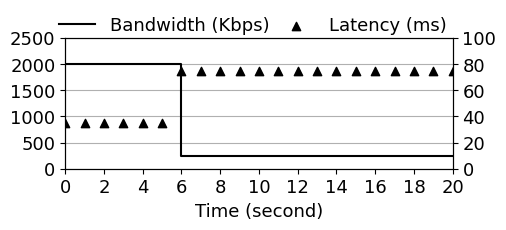

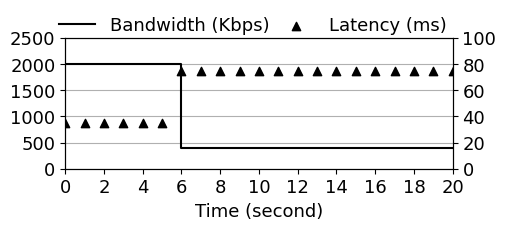

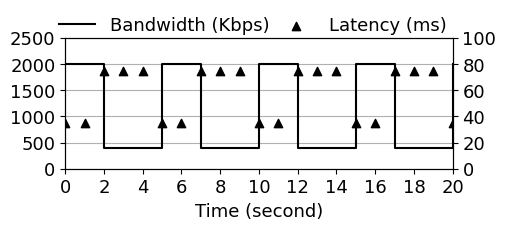

In [34]:
def plot(path, save_path):
    df = pd.read_csv(path, header=None, sep=' ')
    df  =df.rename(columns={0: 'bw',1: 'latency',2: 'drop'})
    df = df[df.index <= 20]

    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(figsize=(5, 1.7))
    ax2 = ax.twinx()

    ax.step(df.index, df['bw'], where='post', color='black')
    ax.set_ylim(0, 2500)
    ax.set_xlim(0, 20)
    ax.grid(which='major', axis='y')
    ax.set_axisbelow(True)
    _ = plt.xticks(np.arange(0, df.index.max()+1, 2.0))
    ax.yaxis.set_ticks(np.arange(0, 2501, 500))
    # _ = plt.yticks(np.arange(0, 2500, 500))
    ax.set_xlabel('Time (second)')


    ax2.scatter(df.index, df['latency'], color='black', marker='^')
    ax2.set_ylim(0, 100)
    ax2.yaxis.set_ticks(np.arange(0, 101, 20))
    # ax2.yaxis.set_ticks(np.arange())
    fig.legend(['Bandwidth (Kbps)','Latency (ms)'], bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, frameon=False, columnspacing=0.5)
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    plt.show()



bw_profiles = [
    "/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_always_low.txt",
    "/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_always_400.txt",
    "/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_multi-drop.txt"
]

plot(bw_profiles[0], 'bw-profile-drop-low.pdf')
plot(bw_profiles[1], 'bw-profile-drop.pdf')
plot(bw_profiles[2], 'bw-profile-multi-drop.pdf')